In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  

In [ ]:
I chose Google Apps Data to generate some visuals using pyplot.

<function matplotlib.pyplot.show(*args, **kw)>

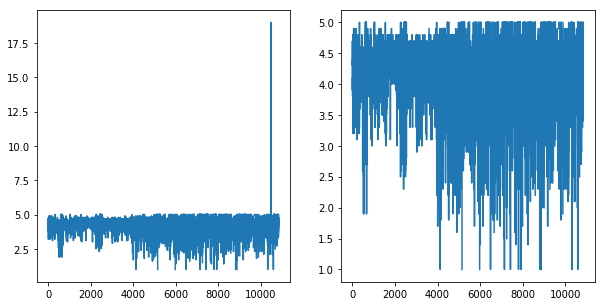

In [3]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df1 = pd.read_csv('googleplaystore.csv')
plt.plot(df1['Rating']) 
plt.subplot(1, 2, 2)
df1 = df1.drop(df1.index[df1.Rating >5])
plt.plot(df1['Rating'])
plt.show

Both plots show the distribution of the ratings belonging to the different apps. However, in the first plot we can observe an outlier - rating that is bigger than 5. We know that the rating can range only between 1 - 5 so the data showing rating more than 1 is incorrect. As I do not have access to the original data, I can not update it so the only way to deal with this discrepancy is to delete the whole record for this particular app. After it is done, we can observe that the new plot(the socond one) is showing the right data. 

In [4]:
df1.columns
Category_Rating_Mean = df1.groupby('Category').aggregate(np.mean)
print(Category_Rating_Mean)

                       Rating
Category                     
ART_AND_DESIGN       4.358065
AUTO_AND_VEHICLES    4.190411
BEAUTY               4.278571
BOOKS_AND_REFERENCE  4.346067
BUSINESS             4.121452
COMICS               4.155172
COMMUNICATION        4.158537
DATING               3.970769
EDUCATION            4.389032
ENTERTAINMENT        4.126174
EVENTS               4.435556
FAMILY               4.192272
FINANCE              4.131889
FOOD_AND_DRINK       4.166972
GAME                 4.286326
HEALTH_AND_FITNESS   4.277104
HOUSE_AND_HOME       4.197368
LIBRARIES_AND_DEMO   4.178462
LIFESTYLE            4.094904
MAPS_AND_NAVIGATION  4.051613
MEDICAL              4.189143
NEWS_AND_MAGAZINES   4.132189
PARENTING            4.300000
PERSONALIZATION      4.335987
PHOTOGRAPHY          4.192114
PRODUCTIVITY         4.211396
SHOPPING             4.259664
SOCIAL               4.255598
SPORTS               4.223511
TOOLS                4.047411
TRAVEL_AND_LOCAL     4.109292
VIDEO_PLAY

In [5]:
Top_10 = Category_Rating_Mean.sort_values('Rating', ascending=False).head(10)
print(Top_10)

                       Rating
Category                     
EVENTS               4.435556
EDUCATION            4.389032
ART_AND_DESIGN       4.358065
BOOKS_AND_REFERENCE  4.346067
PERSONALIZATION      4.335987
PARENTING            4.300000
GAME                 4.286326
BEAUTY               4.278571
HEALTH_AND_FITNESS   4.277104
SHOPPING             4.259664


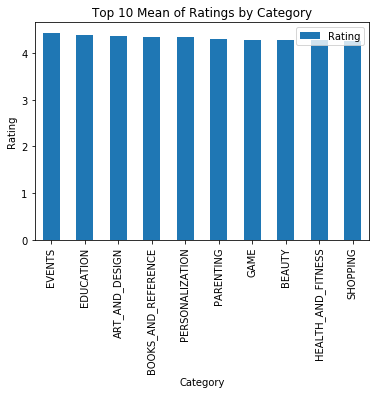

In [58]:
Top_10.plot(kind = 'bar', title = 'Top 10 Mean of Ratings by Category')
plt.ylabel('Rating')
plt.show()

This bar chart shows the Top 10 app categories that have the highest mean of ratings. Event, Education and Art and Design are the top 3 apps among the 10.  

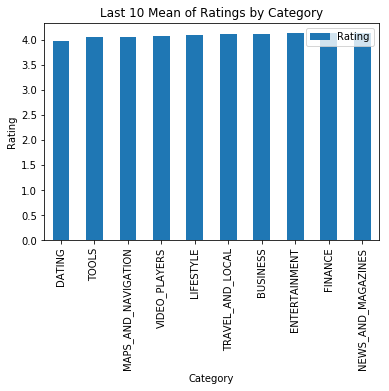

In [59]:
Top_10_lowest = Category_Rating_Mean.sort_values('Rating', ascending=True).head(10)
Top_10_lowest.plot(kind = 'bar', title = 'Last 10 Mean of Ratings by Category')
plt.ylabel('Rating')
plt.show()

The plot shown above, however, shows the apps' categories with the lowest mean of their ratings - top 3 are Dating, Tools, Maps and navigation. 

In [9]:
df1["Reviews"] = pd.to_numeric(df1["Reviews"])

In [47]:
aggr = df1.groupby(['Content Rating'],  as_index=False)['Reviews'].sum()
aggr2 = pd.DataFrame(aggr)
print(aggr2)

    Content Rating     Reviews
0  Adults only 18+       81348
1         Everyone  2801847376
2     Everyone 10+   683997228
3       Mature 17+   197166533
4             Teen  1131523721
5          Unrated        1187


In [40]:
aggr3 = df1.groupby(['Content Rating'],  as_index=False)['App'].count()
print(aggr3)

    Content Rating   App
0  Adults only 18+     3
1         Everyone  8714
2     Everyone 10+   414
3       Mature 17+   499
4             Teen  1208
5          Unrated     2


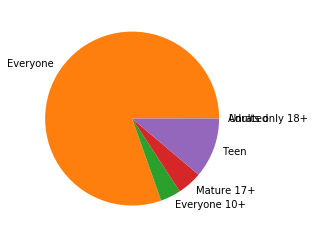

In [42]:
plt.pie(aggr3['App'], labels = aggr3['Content Rating'])
plt.show()

Most of the apps have content that is suitable for everyone and without specifying a particular autitory. Thus, the majority of the reviews are given by people who are classified as 'everyone' and do not fall into a any specific category such as Teens only, Adults 18+ etc.

In [53]:
aggr4 = df1.groupby(['App'],as_index=False)['Reviews'].sum()
print(aggr4)

                                                    App  Reviews
0                  "i DT" Fútbol. Todos Somos Técnicos.       27
1                         +Download 4 Instagram Twitter    40467
2                            - Free Comics - Comic Apps      115
3                                                    .R      259
4                                                /u/app      573
5                                                058.ba       27
6                                        1. FC Köln App     2019
7                                 10 Best Foods for You     4980
8                         10 Minutes a Day Times Tables      681
9        10 WPM Amateur ham radio CW Morse code trainer       10
10                           10,000 Quotes DB (Premium)       70
11                                 100 Doors of Revenge   105766
12                                      100+ C Programs       20
13      100000+ Messages - DP, Status, Jokes & GIF 2018      121
14                       

                     App    Reviews
5399           Instagram  266241989
9041  WhatsApp Messenger  207348304
2564      Clash of Clans  179558781


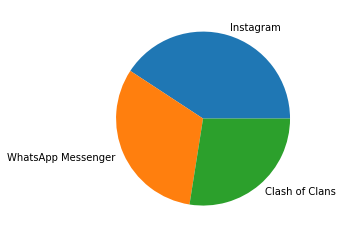

In [56]:
Top_3_apps = aggr4.sort_values('Reviews', ascending=False).head(3)
print(Top_3_apps)
plt.pie(Top_3_apps['Reviews'], labels = Top_3_apps['App'])
plt.show()

The chart above shows that the apps with the biggest number of reviews are: Instagram, Watsapp and Clash of Clans.